# Module 2.7 Training a linear regression model

## Setup

### Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load training data

In [19]:
df_train = pd.read_csv('02-regression/notebooks/data_train.csv')
print(df_train.shape)
df_train.head()

(7150, 16)


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695
1,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495
2,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650
3,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,16170
4,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,2000


## Calculation of weights

### Notes

From https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/07-linear-regression-training.md

Obtaining predictions as close as possible to $y$ target values requires the calculation of weights from the general
LR equation. The feature matrix does not 
have an inverse because it is not square, so it is required to obtain an approximate solution, which can be
obtained using the **Gram matrix** 
(multiplication of feature matrix ($X$) and its transpose ($X^T$)). The vector of weights or coefficients $w$ obtained with this
formula is the closest possible solution to the LR system.

Normal Equation:

$w$ = $(X^TX)^{-1}X^Ty$

Where:

$X^TX$ is the Gram Matrix

### Implementation

In [20]:
def train_linear_regression_demo(X, y):
    """Train linear regression model. Not implemented yet."""
    pass

In [21]:
# Given fake data from previous notebook
# Let's create a bunch of fake car features into a matrix
X_orig = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X_orig = np.array(X_orig)  # convert to numpy array
X_orig

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [22]:
y = [10000, 20000, 15000, 20050, 10000, 20000,
     15000, 25000, 12000]  # fake target variable

In [23]:
def train_linear_regression(X, y):
    """Train linear regression model using the Normal Equation."""
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  # add bias column of ones
    XTX = X.T.dot(X)  # Gram matrix
    XTX_inv = np.linalg.inv(XTX)  # inverse of Gram matrix
    w_full = XTX_inv.dot(X.T).dot(y)  # weights including bias

    return w_full[0], w_full[1:]  # return bias and weights

In [24]:
(bias, weights) = train_linear_regression(X_orig, y)
print(f'bias={bias}, weights={weights}')

bias=25844.754055766833, weights=[ -16.08906468 -199.47254894   -1.22802883]


## 2.8 Car price baseline model

In [25]:
# Let's see what features we have in the real dataset
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [26]:
# Let's select our feature columns
base = ['engine_hp', 'engine_cylinders',
        'highway_mpg', 'city_mpg', 'popularity']

In [27]:
# Extract training feature matrix
X_train = df_train[base].values
X_train

array([[ 275.,    6.,   18.,   13.,  549.],
       [ 170.,    4.,   38.,   25.,  873.],
       [ 248.,    6.,   28.,   19., 2202.],
       ...,
       [ 150.,    4.,   24.,   17., 1851.],
       [ 160.,    4.,   31.,   22.,  204.],
       [ 274.,    4.,   27.,   17., 1439.]], shape=(7150, 5))

In [28]:
df_train[base].isnull().sum()  # check for missing values

engine_hp           52
engine_cylinders    16
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [29]:
# There are missing values in engine_hp and engine_cylinders
# Let's fill them with 0
# Note: In a real scenario, consider more sophisticated imputation methods
X_train = df_train[base].fillna(0).values
X_train

array([[ 275.,    6.,   18.,   13.,  549.],
       [ 170.,    4.,   38.,   25.,  873.],
       [ 248.,    6.,   28.,   19., 2202.],
       ...,
       [ 150.,    4.,   24.,   17., 1851.],
       [ 160.,    4.,   31.,   22.,  204.],
       [ 274.,    4.,   27.,   17., 1439.]], shape=(7150, 5))

In [30]:
# Extract training target vector
y_train = np.log1p(df_train.msrp.values)
y_train

array([10.29876764, 10.32535081, 10.53611479, ...,  9.83258214,
        9.96062374, 10.28537692], shape=(7150,))

In [31]:
# Train the model on the real dataset
(w0, w) = train_linear_regression(X_train, y_train)

# Make predictions
y_pred = w0 + X_train.dot(w)

# Display results
print(f'bias={w0}, weights={w}')
print(f'predictions: {y_pred}')

bias=7.9048946245363085, weights=[ 9.35338298e-03 -1.38236607e-01  1.49631207e-02  1.51021128e-02
 -1.97546303e-05]
predictions: [10.10247365  9.87092892 10.05752179 ...  9.33424064  9.64056275
 10.5470884 ]


<Axes: ylabel='Count'>

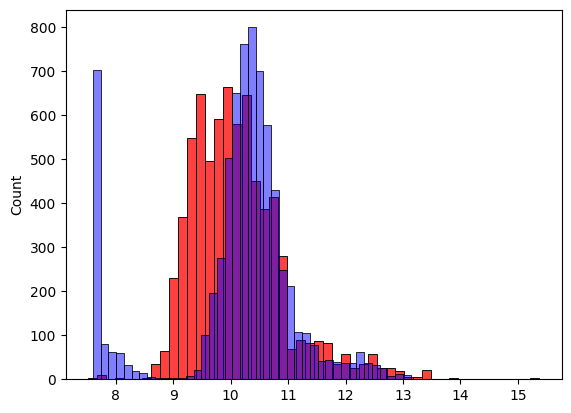

In [32]:
# Plot true vs predicted values
sns.histplot(y_pred, color='red', bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

We can see the predicted values (in red) are off from the true values (in blue).
Further tuning and feature engineering are needed to improve the model's performance.

## 2.9 Root mean squared error (RMSE)

### Notes

From https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/02-regression/09-rmse.md

* In the previous lesson we found out our predictions were a bit off from the actual target values in the training dataset. We need a way to quantify how good or bad the model is. This is where RMSE can be of help.
* Root Mean Squared Error (RMSE) is a way to evaluate regression models. It measures the error associated with the model being evaluated. This numerical figure can then be used to compare models, enabling us to choose the one that gives the best predictions.

$$RMSE = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} {(g(x_i) - y_i)^2}}$$

- $g(x_i)$ is the prediction
- $y_i$ is the actual value
- $m$ is the number of observations in the dataset (i.e. cars)

### Implementation

In [33]:
def rmse(y, y_pred):
    """Calculate Root Mean Squared Error."""
    se = (y - y_pred) ** 2  # squared errors
    mse = se.mean()  # mean squared error
    return np.sqrt(mse)  # root mean squared error

In [34]:
rmse(y_train, y_pred)

np.float64(0.7570200472453603)